In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start= '2010-01-01' 
end='2019-12-31'

df=data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553023
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564356
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553023
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564356
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999


In [5]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


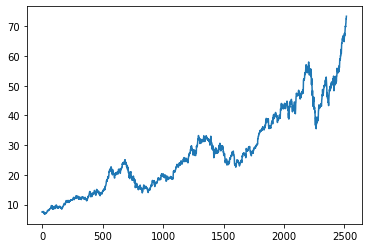

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

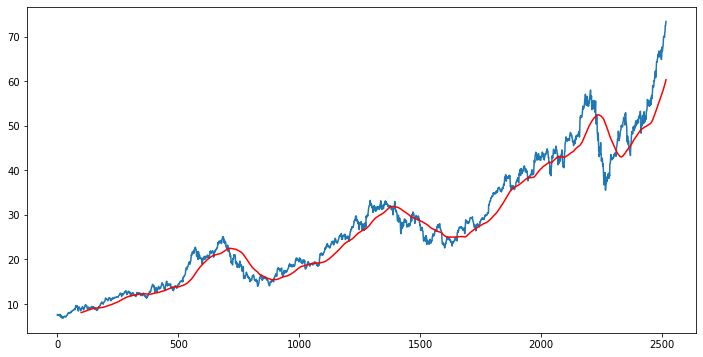

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

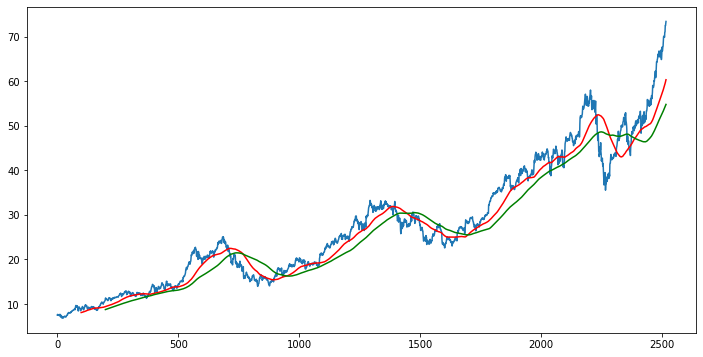

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2517, 5)

In [12]:
# splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [13]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [14]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [17]:
data_training_array.shape

(1761, 1)

In [18]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
x_train, y_train= np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(1661, 100, 1)

In [20]:
# ML Model

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import tensorflow as tf

In [22]:
model=Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences= True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))



model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])
history=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 13s 177ms/step - loss: 0.0606 - mse: 0.0606
Epoch 2/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0131 - mse: 0.0131
Epoch 3/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0112 - mse: 0.0112
Epoch 4/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0102 - mse: 0.0102
Epoch 5/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0089 - mse: 0.0089
Epoch 6/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0087 - mse: 0.0087
Epoch 7/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0085 - mse: 0.0085
Epoch 8/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0081 - mse: 0.0081
Epoch 9/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0073 - mse: 0.0073
Epoch 10/50
52/52 [==============================] - 9s 171ms/step - loss: 0.0077 - mse: 0.0077
Epoch 11/50
52/52 [=============================

[0.060609690845012665,
 0.013112957589328289,
 0.011186662130057812,
 0.010152269154787064,
 0.008927172049880028,
 0.008717051707208157,
 0.008478013798594475,
 0.008079725317656994,
 0.007270481903105974,
 0.007651385851204395,
 0.006651117466390133,
 0.006273691076785326,
 0.006598058622330427,
 0.0056775216944515705,
 0.0062951743602752686,
 0.005738196894526482,
 0.005961544346064329,
 0.005531262140721083,
 0.005831145215779543,
 0.0049363840371370316,
 0.005314039997756481,
 0.005187871865928173,
 0.005233180709183216,
 0.004966276697814465,
 0.004887032322585583,
 0.00463907839730382,
 0.004613611847162247,
 0.004844840615987778,
 0.003933415282517672,
 0.0042768497951328754,
 0.0041126227006316185,
 0.003772322554141283,
 0.0037225806154310703,
 0.0036435641814023256,
 0.004113020375370979,
 0.0034560656640678644,
 0.003304509911686182,
 0.0030513538513332605,
 0.00358582497574389,
 0.003178125713020563,
 0.003137825056910515,
 0.0031282762065529823,
 0.0033985450863838196,
 0

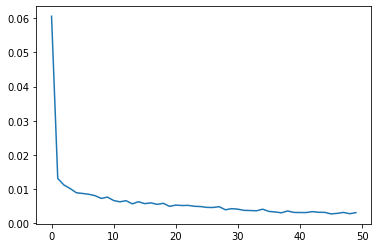

In [25]:
plt.plot(history.history['mse'])
history.history['mse']

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [28]:
past_100_days=data_training.tail(100)

In [29]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [30]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [31]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [32]:
input_data.shape

(856, 1)

In [33]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [34]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [35]:
# Making Predictions

y_predicted=model.predict(x_test)

In [36]:
y_predicted.shape

(756, 1)

In [37]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [38]:
y_predicted

array([[0.13547076],
       [0.1364854 ],
       [0.13737229],
       [0.13810894],
       [0.13869065],
       [0.13912788],
       [0.13946007],
       [0.13975313],
       [0.14007464],
       [0.1404775 ],
       [0.14099178],
       [0.14161257],
       [0.14232641],
       [0.14312041],
       [0.14396864],
       [0.1448409 ],
       [0.1457106 ],
       [0.14655234],
       [0.14736894],
       [0.14818719],
       [0.1490252 ],
       [0.14988634],
       [0.15075612],
       [0.15172362],
       [0.15293777],
       [0.15449902],
       [0.15647674],
       [0.15891364],
       [0.16181557],
       [0.16514805],
       [0.16883352],
       [0.17278795],
       [0.17695673],
       [0.18129712],
       [0.18575516],
       [0.19027135],
       [0.19479397],
       [0.199274  ],
       [0.20365089],
       [0.20786284],
       [0.21185577],
       [0.21558496],
       [0.21905766],
       [0.22228263],
       [0.2252777 ],
       [0.22805189],
       [0.23060995],
       [0.232

In [77]:
mse=np.square(np.subtract(y_test,y_predicted)).mean()
mse

0.05735194045698494

In [78]:
rmse=np.sqrt(np.mean(((y_predicted-y_test)**2)))
rmse

0.2394826516827157

In [84]:
MAPE=np.mean(np.abs((y_test-y_predicted)/y_test))*100
MAPE

59.4132021599587

In [ ]:
scaler.scale_

array([0.02099517])

In [ ]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

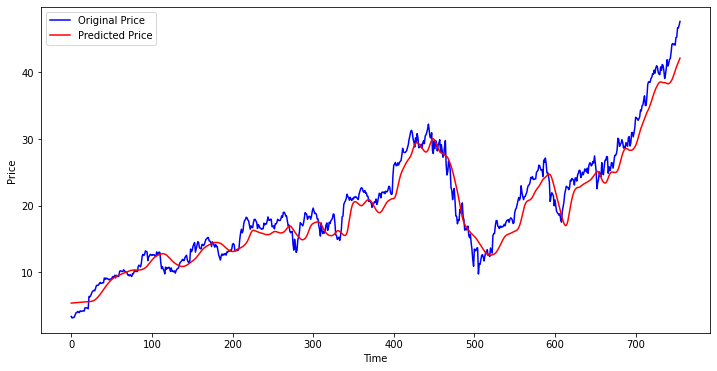

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()